In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def triples_per_graph(dataset):
    l = []
    for graph in dataset:
        l.append(int((len(get_elements(graph))-1)/3))
    return l

def triples_per_graph_d(dataset):
    l = triples_per_graph(dataset)
    return {'min': np.min(l), 'max': np.max(l), 'avg':np.mean(l), 'std':np.std(l)}

def unique_entities(dataset):
    entities = set()
    for graph in dataset:
        entities.update(get_nodes(graph))
    return len(entities)

def unique_relations(dataset):
    relations = set()
    for graph in dataset:
        relations.update(get_relations(graph))
    return len(relations)
        
def get_elements(graph):
    elements = re.split(r'<[A H R T]> ', graph)[1:]
    return [e.strip() for e in elements]

def get_nodes(graph):
    elements = get_elements(graph)
    nodes = []
    for i in range(len(elements)-1):
        if i%3 == 1:
            continue
        nodes.append(elements[i+1])
    return set(nodes)

def get_relations(graph):
    elements = get_elements(graph)
    relations = []
    for i in range(len(elements)-1):
        if i%3 == 1:
            relations.append(elements[i+1])
            continue
    return set(relations)

def question_d(questions):
    l = []
    for question in questions:
        l.append(len(question.split()))
    return {'min': np.min(l), 'max': np.max(l), 'avg':np.mean(l), 'std':np.std(l)}

def descriptives(src, questions):
    fulldict = {'total_samples': len(src),
                   'triples_per_graph': triples_per_graph_d(src),
                   'total_entities': unique_entities(src),
                   'total_relations': unique_relations(src),
                   'question_descriptives': question_d(questions)
                  }
    return fulldict

In [6]:
def get_descriptives(dataset):
    splits = ['train', 'val', 'test']
    
    srcdata = []
    for split in splits:
        file = f'data/{dataset}/src_a_{split}.txt'
        with open(file, 'r', encoding='utf-8') as f:
            srcdata += f.read().splitlines()
    
    tgtdata = []
    for split in splits:
        file = f'data/{dataset}/tgt_{split}.txt'
        with open(file, 'r', encoding='utf-8') as f:
            tgtdata += f.read().splitlines()
    return descriptives(srcdata, tgtdata)

In [7]:
get_descriptives('PQ')

{'total_samples': 11793,
 'triples_per_graph': {'min': 2,
  'max': 3,
  'avg': 2.703044178750106,
  'std': 0.45691690872159124},
 'total_entities': 2880,
 'total_relations': 116,
 'question_descriptives': {'min': 6,
  'max': 21,
  'avg': 12.429576867633342,
  'std': 2.458538812291408}}

In [8]:
get_descriptives('WQ')

{'total_samples': 22989,
 'triples_per_graph': {'min': 0,
  'max': 86,
  'avg': 4.167297403105834,
  'std': 5.550924382730383},
 'total_entities': 16776,
 'total_relations': 547,
 'question_descriptives': {'min': 4,
  'max': 35,
  'avg': 14.113489059985211,
  'std': 4.153912309391954}}

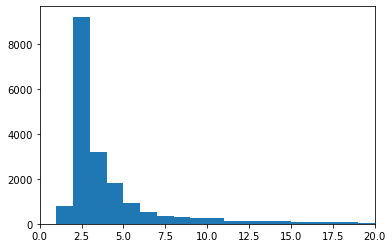

In [104]:
plt.xlim(0, 20)
plt.hist(triples_per_graph(data), bins = 86);